In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [ ]:

from sklearn.impute import SimpleImputer

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
import plotly.express as px

*First part: We will explore the datasets, understand the context, check the data and clean the dataset*

**Context:**



*Currently, the metropolitan areas centered on Montreal, Calgary, Toronto, Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, and Cleveland, are included in the dataset.*

**Inference**: Any kind of imputation techniques will be applied keeping the context in mind.

**Check and Clean**

**1.Reading the datasets and exploring the data**

In [ ]:
business_csv=pd.read_csv('/content/drive/MyDrive/csv/business.csv')

In [ ]:
business_eda=pd.read_csv('/content/drive/MyDrive/csv/business.csv')

In [ ]:
business_csv.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


*Visualising the kind of business' we have in our dataset*

In [ ]:
business_csv.describe()

,Unnamed: 0,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,75172.500000,36.671150,-89.357339,3.596724,44.866561,0.79615
std,43401.296123,5.872759,14.918502,0.974421,121.120136,0.40286
min,0.000000,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,37586.250000,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,75172.500000,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,112758.750000,39.954036,-75.421542,4.500000,37.000000,1.00000
max,150345.000000,53.679197,-73.200457,5.000000,7568.000000,1.00000


**From this, we can observe that stars range from minimum 1 to maximum 5 for any business**

In [ ]:
business_csv.dtypes

Unnamed: 0        int64
business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

**Dealing with missing values in business dataset and cleaning**

In [ ]:
business_csv.isnull().sum()

Unnamed: 0          0
business_id         0
name                0
address          5127
city                0
state               0
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

**We have missing values in address,attribues,hours, postal_code. We will be imputing them according to the context**

In [ ]:
business_csv.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [ ]:
business_csv.drop(['Unnamed: 0'],axis=1,inplace=True)

***Unnamed: 0 can be dropped***

In [ ]:
business_csv.drop(['address','postal_code'],axis=1,inplace=True)

**Dropping address, postal_code as latitude and longitude give the exact location and there is no way to impute these columns in a meaningful way.**

**We would like to convert dtype of textual data to string dtype. Article which was referred here:** https://towardsdatascience.com/why-we-need-to-use-pandas-new-string-dtype-instead-of-object-for-textual-data-6fd419842e24

In [ ]:
business_csv[['name','city', 'state']]=business_csv[['name','city', 'state']].astype('string')

In [ ]:
business_csv['hours']=business_csv['hours'].replace(np.NaN,np.nan)

In [ ]:
standard_hour={'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', 'Wednesday': '8:0-22:0', 'Thursday': '8:0-22:0', 'Friday': '8:0-23:0', 'Saturday': '8:0-23:0', 'Sunday': '8:0-22:0'}
business_csv['hours']=business_csv['hours'].apply(lambda x: x if x == x else standard_hour)

***We have filled the missing values in hours column with standard hours, keeping the nature of business under consideration.***

In [ ]:
business_csv.isnull().sum()

business_id         0
name                0
city                0
state               0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours               0
dtype: int64

In [ ]:
business_csv[business_csv['attributes'].isna()]

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,St. Petersburg,FL,27.766590,-82.732983,3.5,5,1,NaN,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
18,8wGISYjYkE2tSqn3cDMu8A,Nifty Car Rental,Kenner,LA,29.981183,-90.254012,3.5,14,1,NaN,"Automotive, Car Rental, Hotels & Travel, Truck...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
25,PSo_C1Sfa13JHjzVNW6ziQ,Indian Walk Veterinary Center,Newtown,PA,40.273493,-74.987496,5.0,15,1,NaN,"Pet Services, Pet Groomers, Pets, Veterinarians","{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ..."
42,lwItZ1Ck3KtpCgG4CPFmpQ,Stomel Elliot Attorney-At-Law,Cherry Hill,NJ,39.915478,-75.016973,5.0,5,1,NaN,"DUI Law, Professional Services, Lawyers, Crimi...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
51,REwfwz-_-CMQ7Np5UVi9Qg,Jennie Deckert,Carmel,IN,39.969300,-86.165002,5.0,7,1,NaN,"Real Estate Agents, Home Services, Real Estate","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
150300,9RGR4_r4PJLTooNmscUE_A,Roger's Chevron Service,New Orleans,LA,30.022340,-90.052255,4.0,5,1,NaN,"Automotive, Gas Stations","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
150302,DMYTGaunth3BMi7SmQEdvQ,PetSuites Greenwood,Greenwood,IN,39.631153,-86.085342,4.0,17,1,NaN,"Pet Groomers, Pets, Pet Services, Pet Boarding...","{'Monday': '0:0-0:0', 'Tuesday': '6:30-20:0', ..."
150308,-a7VXX0-V9LgWMFrq90iNA,Delran Auto Body,Delran,NJ,40.021346,-74.932089,3.5,5,1,NaN,"Body Shops, Automotive","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
150332,t_SGoRT5yt14OWr64TOulA,Sherwood Park Kwik Lube,Sherwood Park,AB,53.513215,-113.328680,5.0,5,1,NaN,"Oil Change Stations, Automotive, Auto Repair","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [ ]:
business_csv[['attributes']].mode()

,attributes
0,{'BusinessAcceptsCreditCards': 'True'}


*Filling the missing values for categories and attributes with most_frequent as we can see that most freqent attribute is related to credit cards*

In [ ]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.NaN)

In [ ]:
imputer = imputer.fit(business_csv[['attributes']])
business_csv[['attributes']] = imputer.transform(business_csv[['attributes']])

*We will nan values in category column with other*

In [ ]:
business_csv['categories']=business_csv['categories'].apply(lambda x: x if x == x else "other")

In [ ]:
business_csv.to_pickle('business_modified')

In [ ]:
business_modified=pd.read_pickle('/content/drive/MyDrive/Restaurant_recommender_system/business_modified')

In [ ]:
business_eda=pd.read_pickle('/content/drive/MyDrive/Restaurant_recommender_system/business_modified')

In [ ]:
# We want to find the frequency of different types of business'
dictionary_restaurants={}

for i in range(len(business_eda)):
  category=business_eda['categories'][i].split(',')
  category=[j.strip() for j in category]

  for k in range(len(category)):
    if category[k] in dictionary_restaurants.keys():
      dictionary_restaurants[category[k]]+=1
    else:
      dictionary_restaurants[category[k]]=1

In [ ]:
dictionary_restaurants

In [ ]:
dictionary_restaurants=dict(sorted(dictionary_restaurants.items(),key= lambda item:item[1],reverse=True))

In [ ]:
frequency=list(dictionary_restaurants.values())

In [ ]:
labels=list(dictionary_restaurants.keys())

*Making a pie chart below to visualize the top 10 business' by frequency*

In [ ]:
# Creating explode data
explode = (0.1, 0.1, 0.2, 0.1, 0.0, 0.0,0.0,0.0,0.0,0.0)

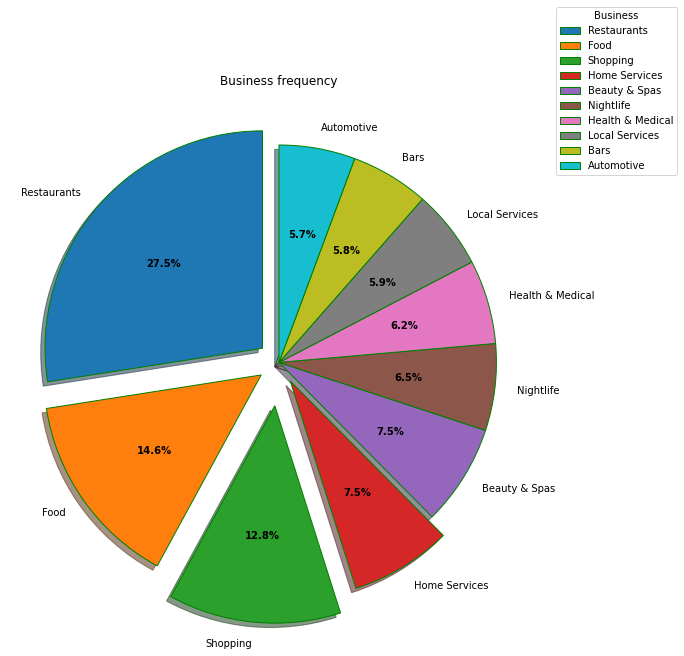

In [ ]:
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating plot
fig, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts = ax.pie(frequency[:10],
                                  autopct='%1.1f%%',
                                  explode = explode,
                                  labels = labels[:10],
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, labels[:10],
          title ="Business",
          loc ="center left",
          bbox_to_anchor =(1, 0.5, 0.5, 1))
 
plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Business frequency")
 
# show plot
plt.show()

Referred from : https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

*We can see that the business's in our dataset at primarily restaurants*

*Below, we explore how many business' are there per city*

In [ ]:
modified_dataset_eda=pd.read_pickle("/content/drive/MyDrive/Restaurant_recommender_system/business_modified")

In [ ]:
top_business_cities=modified_dataset_eda.groupby(['city'])['business_id'].count().sort_values(ascending=False)


In [ ]:
top_business_cities=top_business_cities.reset_index()

In [ ]:
top_business_cities.rename(columns={'business_id':"count"},inplace=True)

*Cities where most number of business' are present can be seen from the below graph*

In [ ]:
fig=px.bar(top_business_cities.iloc[0:10],y='count',x='city',title="No of business' in cities",text='count')
fig.update_traces(textfont_size=10, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

As we can see, most of the business' are present in ***Philadelphia***

# User dataset

In [ ]:
user_csv=pd.read_csv('/content/drive/MyDrive/csv/user.csv')

In [ ]:
user_csv.head()

,Unnamed: 0,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",...,65,55,56,18,232,844,467,467,239,180
1,1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",...,13,10,17,3,66,96,119,119,35,18
3,3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",...,4,1,6,2,12,16,26,26,10,9
4,4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",...,1,0,0,0,1,1,0,0,0,0


In [ ]:
user_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   user_id             object 
 2   name                object 
 3   review_count        int64  
 4   yelping_since       object 
 5   useful              int64  
 6   funny               int64  
 7   cool                int64  
 8   elite               object 
 9   friends             object 
 10  fans                int64  
 11  average_stars       float64
 12  compliment_hot      int64  
 13  compliment_more     int64  
 14  compliment_profile  int64  
 15  compliment_cute     int64  
 16  compliment_list     int64  
 17  compliment_note     int64  
 18  compliment_plain    int64  
 19  compliment_cool     int64  
 20  compliment_funny    int64  
 21  compliment_writer   int64  
 22  compliment_photos   int64  
dtypes: float64(1), int64(17), object(5)
memory usage: 348.8+ 

In [ ]:
user_csv.describe()

,Unnamed: 0,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,9.939480e+05,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,5.738566e+05,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.969740e+05,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.939480e+05,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.490922e+06,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.987896e+06,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


In [ ]:
user_csv.isnull().sum()/len(user_csv)*100

Unnamed: 0             0.000000
user_id                0.000000
name                   0.000402
review_count           0.000000
yelping_since          0.000000
useful                 0.000000
funny                  0.000000
cool                   0.000000
elite                 95.412338
friends                0.000000
fans                   0.000000
average_stars          0.000000
compliment_hot         0.000000
compliment_more        0.000000
compliment_profile     0.000000
compliment_cute        0.000000
compliment_list        0.000000
compliment_note        0.000000
compliment_plain       0.000000
compliment_cool        0.000000
compliment_funny       0.000000
compliment_writer      0.000000
compliment_photos      0.000000
dtype: float64

As we can see, elite is 95 % null values, we can drop such column

In [ ]:
user_csv.drop(['elite'],axis=1,inplace=True)

*Replacing null values in name column with empty string*

In [ ]:
user_csv['name']=user_csv['name'].apply(lambda x:x if x==x else "")

In [ ]:
user_csv.to_pickle('user_modified')

**Review dataset**

In [ ]:
review_csv=pd.read_csv('/content/drive/MyDrive/csv/review.csv')

In [ ]:
review_csv.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
review_csv.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
review_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   review_id    object 
 2   user_id      object 
 3   business_id  object 
 4   stars        float64
 5   useful       int64  
 6   funny        int64  
 7   cool         int64  
 8   text         object 
 9   date         object 
dtypes: float64(1), int64(4), object(5)
memory usage: 533.3+ MB


In [ ]:
review_csv.describe()

,Unnamed: 0,stars,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06
mean,3.495140e+06,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01
std,2.017920e+06,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00
min,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.747570e+06,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.495140e+06,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.242709e+06,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,6.990279e+06,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02


**Tips dataset**

In [ ]:
tips_csv=pd.read_csv('/content/drive/MyDrive/csv/tip.csv')

In [ ]:
tips_csv.head()

,Unnamed: 0,user_id,business_id,text,date,compliment_count
0,0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
tips_csv.isnull().sum()

Unnamed: 0          0
user_id             0
business_id         0
text                5
date                0
compliment_count    0
dtype: int64

In [ ]:
tips_csv.shape

(908915, 6)

In [ ]:
tips_csv['text']=tips_csv['text'].apply(lambda x:x if x==x else "")

We have replaced nan values in text column with empty string

**Checkin dataset**

In [ ]:
checkin_csv=pd.read_csv('/content/drive/MyDrive/csv/checkin.csv')

In [ ]:
checkin_csv.head()

,Unnamed: 0,business_id,date
0,0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [ ]:
checkin_csv.drop(['Unnamed: 0'],axis=1,inplace=True)

*We are building a restaurant recommendation system so we will take only those business' which are restaurants out of the total business'*

In [ ]:
for i in range(len(business_modified)):
  after_split= business_modified['categories'][i].split(',')
  after_split=[x.strip() for x in after_split]

  if ("Restaurants" not in after_split):
    business_modified.drop([i],inplace=True)


In [ ]:
business_modified.to_pickle('only_restaurant_business')

In [ ]:
only_restaurant_business=pd.read_pickle('/content/drive/MyDrive/Restaurant_recommender_system/only_restaurant_business')

We will be merging this dataset with review dataset

In [ ]:
only_restaurant_business.columns

Index(['business_id', 'name', 'city', 'state', 'latitude', 'longitude',
       'stars', 'review_count', 'is_open', 'attributes', 'categories',
       'hours'],
      dtype='object')

In [ ]:
review_csv.rename(columns={'stars':'user_stars'},inplace=True)

In [ ]:
review_csv.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'user_stars',
       'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')

In [ ]:
merged_review_restaurants=pd.merge(review_csv,only_restaurant_business,on='business_id')

In [ ]:
merged_review_restaurants.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'user_stars',
       'useful', 'funny', 'cool', 'text', 'date', 'name', 'city', 'state',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

*Dropping unnamed: 0 column from our dataset*

In [ ]:
merged_review_restaurants.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
merged_review_restaurants.to_pickle('merged_review_restaurants')

*Merging user dataset with the above dataset*

In [ ]:
merged_review_restaurants_user=pd.merge(user_csv,merged_review_restaurants,on='user_id')

In [ ]:
merged_review_restaurants_user.columns#head()

Index(['Unnamed: 0', 'user_id', 'name_x', 'review_count_x', 'yelping_since',
       'useful_x', 'funny_x', 'cool_x', 'friends', 'fans', 'average_stars',
       'compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos', 'review_id', 'business_id',
       'user_stars', 'useful_y', 'funny_y', 'cool_y', 'text', 'date', 'name_y',
       'city', 'state', 'latitude', 'longitude', 'stars', 'review_count_y',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [ ]:
merged_review_restaurants_user.rename(columns={'name_x':'user_name','review_count_x':'user_review_count','review_count_y':'business_review_count'},inplace=True)

In [ ]:
merged_review_restaurants_user.isnull().sum()

Unnamed: 0               0
user_id                  0
user_name                0
user_review_count        0
yelping_since            0
useful_x                 0
funny_x                  0
cool_x                   0
friends                  0
fans                     0
average_stars            0
compliment_hot           0
compliment_more          0
compliment_profile       0
compliment_cute          0
compliment_list          0
compliment_note          0
compliment_plain         0
compliment_cool          0
compliment_funny         0
compliment_writer        0
compliment_photos        0
review_id                0
business_id              0
user_stars               0
useful_y                 0
funny_y                  0
cool_y                   0
text                     0
date                     0
name_y                   0
city                     0
state                    0
latitude                 0
longitude                0
stars                    0
business_review_count    0
i

In [ ]:
merged_review_restaurants_user.to_pickle('/content/drive/MyDrive/Restaurant_recommender_system/merged_user_review_restaurant')

In [ ]:
merged_review_restaurants_user_eda=pd.read_pickle('/content/drive/MyDrive/Restaurant_recommender_system/merged_user_review_restaurant')

In [ ]:
merged_review_restaurants_user_eda.head()

,Unnamed: 0,user_id,user_name,user_review_count,yelping_since,useful_x,funny_x,cool_x,friends,fans,...,city,state,latitude,longitude,stars,business_review_count,is_open,attributes,categories,hours
0,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,Carpinteria,CA,34.406833,-119.548583,4.5,885,1,"{'GoodForKids': 'True', 'RestaurantsGoodForGro...","American (Traditional), Restaurants, Seafood, ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-19:30',..."
1,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,Santa Barbara,CA,34.426754,-119.709503,3.0,142,1,"{'GoodForKids': 'True', 'Caters': 'True', 'Out...","Food, Breakfast & Brunch, Grocery, Sandwiches,...","{'Monday': '6:15-21:0', 'Tuesday': '6:15-21:0'..."
2,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,Reno,NV,39.468303,-119.784580,2.5,125,0,"{'RestaurantsAttire': ""'casual'"", 'OutdoorSeat...","Restaurants, Diners","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
3,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,Philadelphia,PA,39.965573,-75.180969,4.5,767,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Art Museums, Jazz & Blues, Arts & Crafts, Amer...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-17:0', ..."
4,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,Sparks,NV,39.533296,-119.758336,2.5,381,1,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...","Restaurants, Cafes, American (Traditional)","{'Monday': '6:0-0:0', 'Tuesday': '6:0-0:0', 'W..."


In [ ]:
merged_review_restaurants_user_eda.columns

Index(['Unnamed: 0', 'user_id', 'user_name', 'user_review_count',
       'yelping_since', 'useful_x', 'funny_x', 'cool_x', 'friends', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'review_id', 'business_id', 'user_stars', 'useful_y', 'funny_y',
       'cool_y', 'text', 'date', 'name_y', 'city', 'state', 'latitude',
       'longitude', 'stars', 'business_review_count', 'is_open', 'attributes',
       'categories', 'hours'],
      dtype='object')

*We will find the restaurants which have the highest average rating*

In [ ]:
best_restaurants=merged_review_restaurants_user_eda.groupby(['name_y','city']).mean(['stars']).sort_values(['stars'],ascending=False)[['stars','longitude','latitude']].reset_index()

In [ ]:
best_restaurants.head()

,name_y,city,stars,longitude,latitude
0,ā café,Boise,5.0,-116.206361,43.616756
1,Sol Azteca,St. Louis,5.0,-90.230300,38.578022
2,Gyro Zone,Lutz,5.0,-82.462796,28.138766
3,Sorella5,New Orleans,5.0,-90.073199,29.948444
4,Gyros King,Hendersonville,5.0,-86.625661,36.332066


In [ ]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
df_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))[197:]
cities.tail()

,name,geometry
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)
201,Singapore,POINT (103.85387 1.29498)


In [ ]:
if "New Orleans" in cities.name:
  print(1)

In [ ]:
fig=px.scatter_geo(best_restaurants.iloc[0:10],lat='latitude',lon='longitude',hover_data=['name_y',"city",'stars'],text='name_y')
fig.update_layout(title = 'Map showing the best restaurants with respective cities and stars', title_x=0.5)
fig.show()

# ***End of preprocessing***